In [1]:
import numpy as np
import pandas as pd

%matplotlib notebook
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

In [2]:
train = pd.read_csv("data/aug_train.csv")

In [3]:
train.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
train.describe()

enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000

In [6]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [8]:
profile = ProfileReport(train)

In [9]:
#profile

In [10]:
train = train.loc[:, train.columns[~ train.columns.str.contains("_id")]]

In [11]:
train.head()

city  city_development_index gender      relevent_experience  \
0  city_103                   0.920   Male  Has relevent experience   
1   city_40                   0.776   Male   No relevent experience   
2   city_21                   0.624    NaN   No relevent experience   
3  city_115                   0.789    NaN   No relevent experience   
4  city_162                   0.767   Male  Has relevent experience   

  enrolled_university education_level major_discipline experience  \
0       no_enrollment        Graduate             STEM        >20   
1       no_enrollment        Graduate             STEM         15   
2    Full time course        Graduate             STEM          5   
3                 NaN        Graduate  Business Degree         <1   
4       no_enrollment         Masters             STEM        >20   

  company_size    company_type last_new_job  training_hours  target  
0          NaN             NaN            1              36     1.0  
1        50-99         Pvt Ltd           >4              47     0.0  
2          NaN             NaN        never              83     0.0  
3          NaN         Pvt Ltd        never              52     1.0  
4        50-99  Funded Startup            4               8     0.0

## NaN

In [12]:
train.isnull().mean()

city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [13]:
train.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

## city

<IPython.core.display.Javascript object>


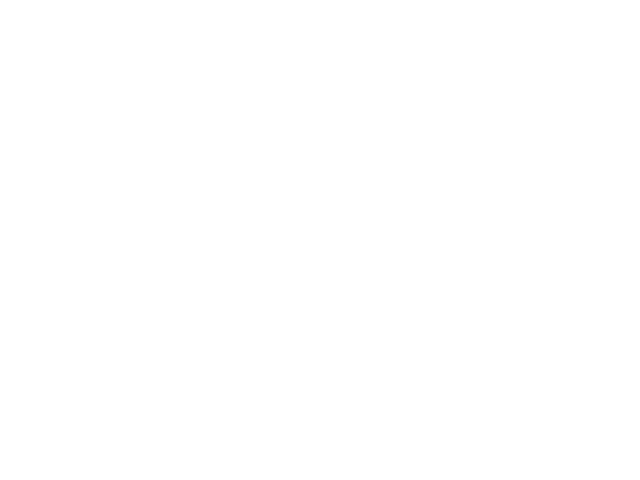

In [14]:
plt.figure()

train["city"].value_counts(normalize=True).plot(kind="barh")

plt.show()

In [15]:
train["city"].value_counts(normalize=True).sort_values(ascending=False)[:10]

city_103    0.227320
city_21     0.141038
city_16     0.080019
city_114    0.069736
city_160    0.044107
city_136    0.030588
city_67     0.022497
city_75     0.015920
city_102    0.015868
city_104    0.015711
Name: city, dtype: float64

In [16]:
most_freq_cities = train["city"].value_counts(normalize=True).sort_values(ascending=False)[:7].index.tolist()
most_freq_cities

['city_103',
 'city_21',
 'city_16',
 'city_114',
 'city_160',
 'city_136',
 'city_67']

In [17]:
train.loc[~ train["city"].isin(most_freq_cities), :]

city  city_development_index gender      relevent_experience  \
1       city_40                   0.776   Male   No relevent experience   
3      city_115                   0.789    NaN   No relevent experience   
4      city_162                   0.767   Male  Has relevent experience   
5      city_176                   0.764    NaN  Has relevent experience   
7       city_46                   0.762   Male  Has relevent experience   
...         ...                     ...    ...                      ...   
19142   city_40                   0.776   Male  Has relevent experience   
19145   city_44                   0.725    NaN   No relevent experience   
19151  city_149                   0.689   Male   No relevent experience   
19153  city_173                   0.878   Male   No relevent experience   
19156   city_65                   0.802   Male  Has relevent experience   

      enrolled_university education_level major_discipline experience  \
1           no_enrollment        Graduate             STEM         15   
3                     NaN        Graduate  Business Degree         <1   
4           no_enrollment         Masters             STEM        >20   
5        Part time course        Graduate             STEM         11   
7           no_enrollment        Graduate             STEM         13   
...                   ...             ...              ...        ...   
19142       no_enrollment             NaN              NaN          5   
19145    Full time course        Graduate             STEM          5   
19151    Full time course        Graduate              NaN          2   
19153       no_enrollment        Graduate       Humanities         14   
19156       no_enrollment     High School              NaN         <1   

      company_size         company_type last_new_job  training_hours  target  
1            50-99              Pvt Ltd           >4              47     0.0  
3              NaN              Pvt Ltd        never              52     1.0  
4            50-99       Funded Startup            4               8     0.0  
5              NaN                  NaN            1              24     1.0  
7              <10              Pvt Ltd           >4              18     1.0  
...            ...                  ...          ...             ...     ...  
19142        10/49  Early Stage Startup            1              26     0.0  
19145          NaN              Pvt Ltd        never             190     0.0  
19151          NaN                  NaN            1              60     0.0  
19153          NaN                  NaN            1              42     1.0  
19156      500-999              Pvt Ltd            2              97     0.0  

[7370 rows x 13 columns]

In [18]:
train.loc[~train["city"].isin(most_freq_cities), :]


city  city_development_index gender      relevent_experience  \
1       city_40                   0.776   Male   No relevent experience   
3      city_115                   0.789    NaN   No relevent experience   
4      city_162                   0.767   Male  Has relevent experience   
5      city_176                   0.764    NaN  Has relevent experience   
7       city_46                   0.762   Male  Has relevent experience   
...         ...                     ...    ...                      ...   
19142   city_40                   0.776   Male  Has relevent experience   
19145   city_44                   0.725    NaN   No relevent experience   
19151  city_149                   0.689   Male   No relevent experience   
19153  city_173                   0.878   Male   No relevent experience   
19156   city_65                   0.802   Male  Has relevent experience   

      enrolled_university education_level major_discipline experience  \
1           no_enrollment        Graduate             STEM         15   
3                     NaN        Graduate  Business Degree         <1   
4           no_enrollment         Masters             STEM        >20   
5        Part time course        Graduate             STEM         11   
7           no_enrollment        Graduate             STEM         13   
...                   ...             ...              ...        ...   
19142       no_enrollment             NaN              NaN          5   
19145    Full time course        Graduate             STEM          5   
19151    Full time course        Graduate              NaN          2   
19153       no_enrollment        Graduate       Humanities         14   
19156       no_enrollment     High School              NaN         <1   

      company_size         company_type last_new_job  training_hours  target  
1            50-99              Pvt Ltd           >4              47     0.0  
3              NaN              Pvt Ltd        never              52     1.0  
4            50-99       Funded Startup            4               8     0.0  
5              NaN                  NaN            1              24     1.0  
7              <10              Pvt Ltd           >4              18     1.0  
...            ...                  ...          ...             ...     ...  
19142        10/49  Early Stage Startup            1              26     0.0  
19145          NaN              Pvt Ltd        never             190     0.0  
19151          NaN                  NaN            1              60     0.0  
19153          NaN                  NaN            1              42     1.0  
19156      500-999              Pvt Ltd            2              97     0.0  

[7370 rows x 13 columns]

In [19]:
train.loc[~train["city"].isin(most_freq_cities), "city"] = "other_city"

In [20]:
train.loc[~train["city"].isin(most_freq_cities), :]

city  city_development_index gender      relevent_experience  \
1      other_city                   0.776   Male   No relevent experience   
3      other_city                   0.789    NaN   No relevent experience   
4      other_city                   0.767   Male  Has relevent experience   
5      other_city                   0.764    NaN  Has relevent experience   
7      other_city                   0.762   Male  Has relevent experience   
...           ...                     ...    ...                      ...   
19142  other_city                   0.776   Male  Has relevent experience   
19145  other_city                   0.725    NaN   No relevent experience   
19151  other_city                   0.689   Male   No relevent experience   
19153  other_city                   0.878   Male   No relevent experience   
19156  other_city                   0.802   Male  Has relevent experience   

      enrolled_university education_level major_discipline experience  \
1           no_enrollment        Graduate             STEM         15   
3                     NaN        Graduate  Business Degree         <1   
4           no_enrollment         Masters             STEM        >20   
5        Part time course        Graduate             STEM         11   
7           no_enrollment        Graduate             STEM         13   
...                   ...             ...              ...        ...   
19142       no_enrollment             NaN              NaN          5   
19145    Full time course        Graduate             STEM          5   
19151    Full time course        Graduate              NaN          2   
19153       no_enrollment        Graduate       Humanities         14   
19156       no_enrollment     High School              NaN         <1   

      company_size         company_type last_new_job  training_hours  target  
1            50-99              Pvt Ltd           >4              47     0.0  
3              NaN              Pvt Ltd        never              52     1.0  
4            50-99       Funded Startup            4               8     0.0  
5              NaN                  NaN            1              24     1.0  
7              <10              Pvt Ltd           >4              18     1.0  
...            ...                  ...          ...             ...     ...  
19142        10/49  Early Stage Startup            1              26     0.0  
19145          NaN              Pvt Ltd        never             190     0.0  
19151          NaN                  NaN            1              60     0.0  
19153          NaN                  NaN            1              42     1.0  
19156      500-999              Pvt Ltd            2              97     0.0  

[7370 rows x 13 columns]

<IPython.core.display.Javascript object>


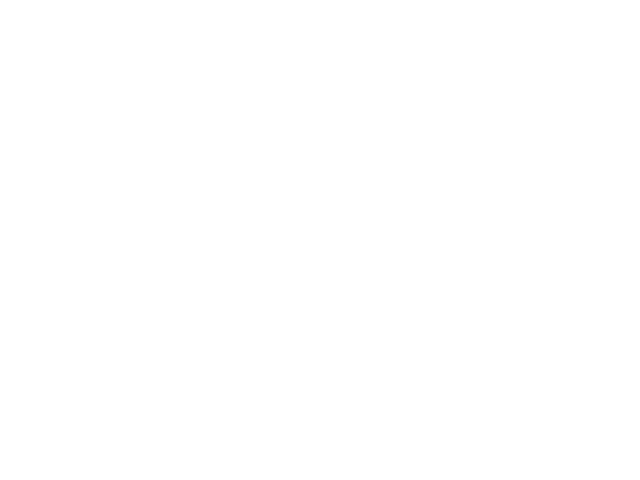

In [21]:
plt.figure()

train["city"].value_counts(normalize=True).plot(kind="barh")

plt.title("city")

plt.ylabel("city_id")
plt.xlabel("percentage")
plt.subplots_adjust(bottom=0.1, left=0.2)

plt.show()

## city_development_index

<IPython.core.display.Javascript object>


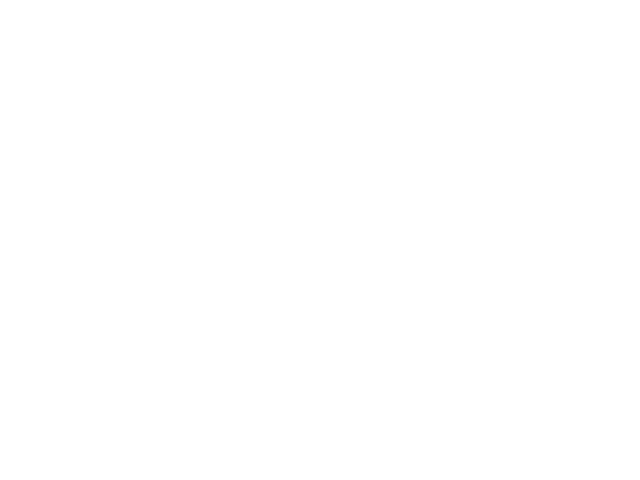

In [22]:
plt.figure()

train["city_development_index"].value_counts(normalize=True).plot(kind="barh")

plt.show()

In [23]:
train.loc[~train["city"].isin(most_freq_cities), "city_development_index"].mean()

0.7981966078697423

In [24]:
train.loc[~train["city"].isin(most_freq_cities), "city_development_index"] = train.loc[~train["city"].isin(most_freq_cities), "city_development_index"].mean().round(3)

<IPython.core.display.Javascript object>


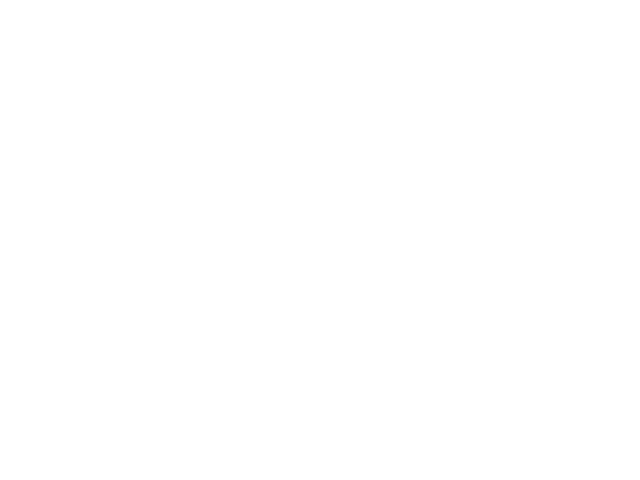

In [25]:
plt.figure()

train["city_development_index"].hist()
plt.subplots_adjust(bottom=0.1, left=0.2)

plt.show()

<IPython.core.display.Javascript object>


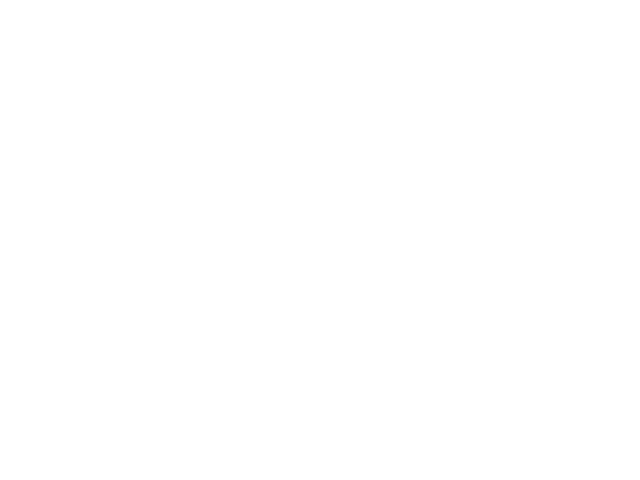

In [26]:
plt.figure()

train["city_development_index"].value_counts(normalize=True).sort_values().plot(kind="barh")
plt.subplots_adjust(bottom=0.1, left=0.1)

plt.show()

## gender

<IPython.core.display.Javascript object>


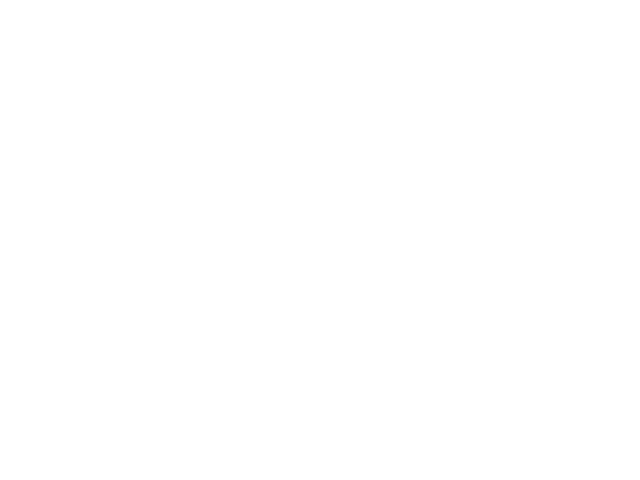

In [27]:
plt.figure()

train["gender"].value_counts(normalize=True).plot(kind="barh")

plt.show()

## relevent_experience

<IPython.core.display.Javascript object>


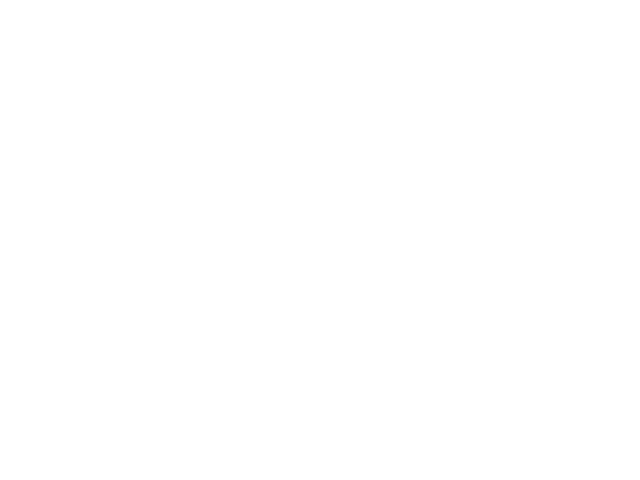

In [28]:
plt.figure()

train["relevent_experience"].value_counts(normalize=True).plot(kind="barh")
plt.subplots_adjust(bottom=0.1, left=0.3)


plt.show()

## enrolled_university

<IPython.core.display.Javascript object>


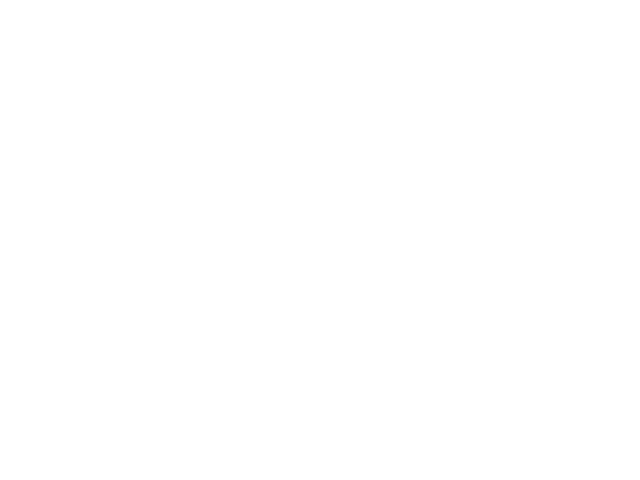

In [29]:
plt.figure()

train["enrolled_university"].value_counts(normalize=True).plot(kind="barh")
plt.subplots_adjust(bottom=0.1, left=0.2)


plt.show()

## education_level

<IPython.core.display.Javascript object>


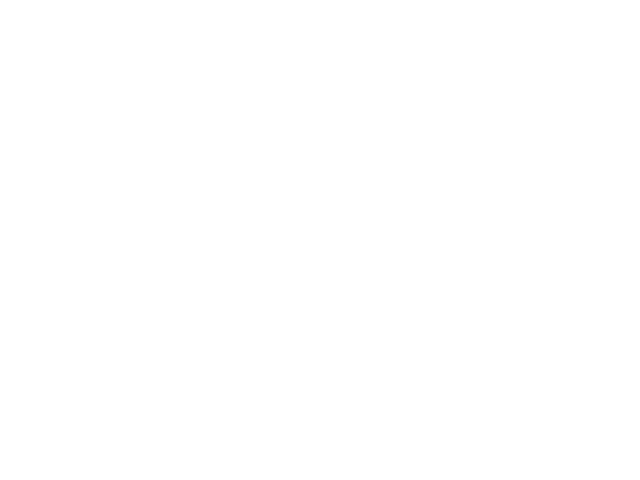

In [30]:
plt.figure()

train["education_level"].value_counts(normalize=True).plot(kind="barh")
plt.subplots_adjust(bottom=0.1, left=0.2)


plt.show()

## major_discipline

<IPython.core.display.Javascript object>


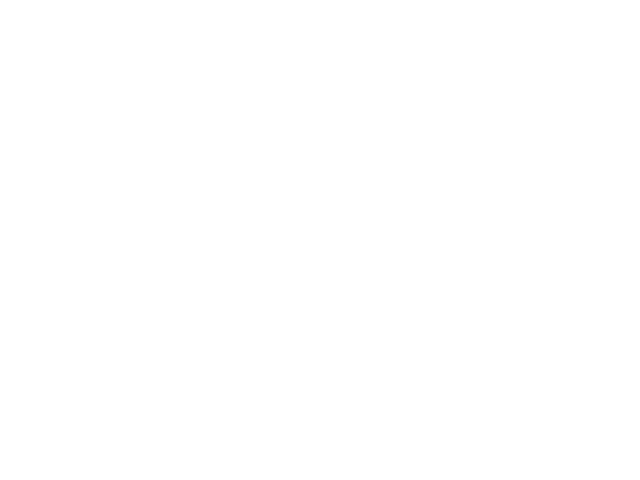

In [31]:
plt.figure()

train["major_discipline"].value_counts(normalize=True).plot(kind="barh")
plt.subplots_adjust(bottom=0.1, left=0.2)


plt.show()

## experience

<IPython.core.display.Javascript object>


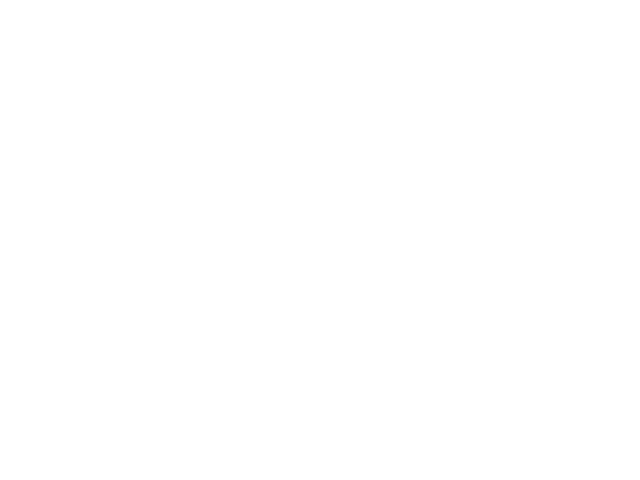

In [32]:
plt.figure()

train["experience"].value_counts(normalize=True).plot(kind="barh")

plt.show()

## company_size

<IPython.core.display.Javascript object>


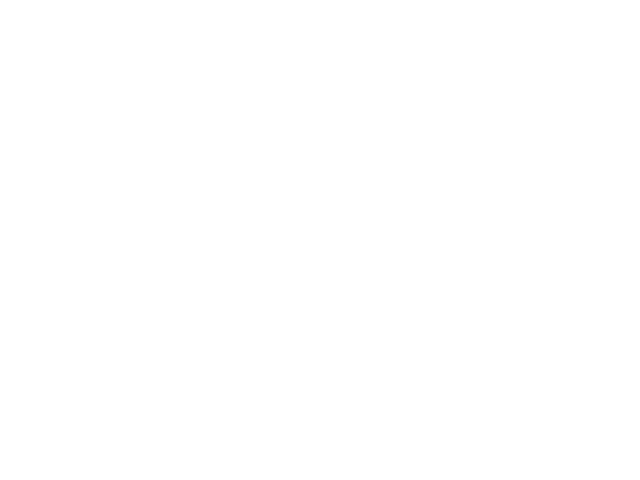

In [33]:
plt.figure()

train["company_size"].value_counts(normalize=True).plot(kind="barh")

plt.show()

## company_type

<IPython.core.display.Javascript object>


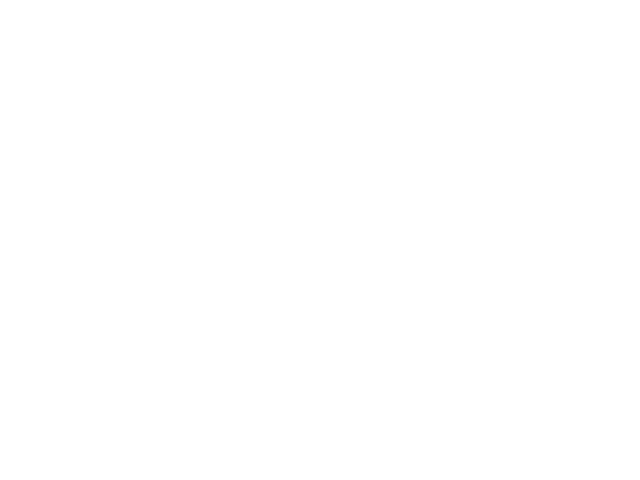

In [34]:
plt.figure()

train["company_type"].value_counts(normalize=True).plot(kind="barh")
plt.subplots_adjust(bottom=0.1, left=0.3)


plt.show()

## last_new_job

<IPython.core.display.Javascript object>


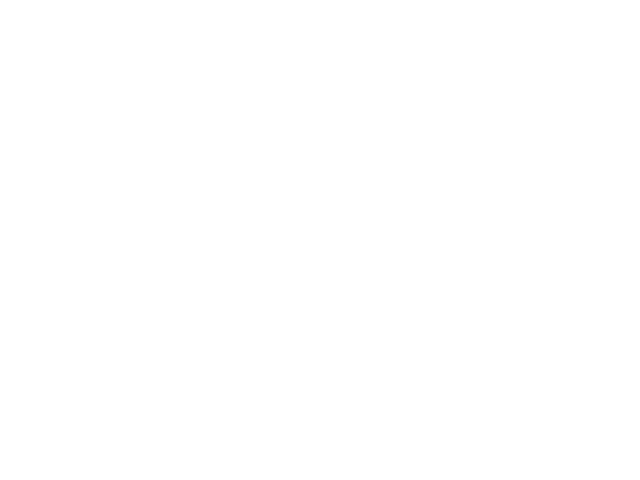

In [35]:
plt.figure()

train["last_new_job"].value_counts(normalize=True).plot(kind="barh")

plt.show()

## training_hours

<IPython.core.display.Javascript object>


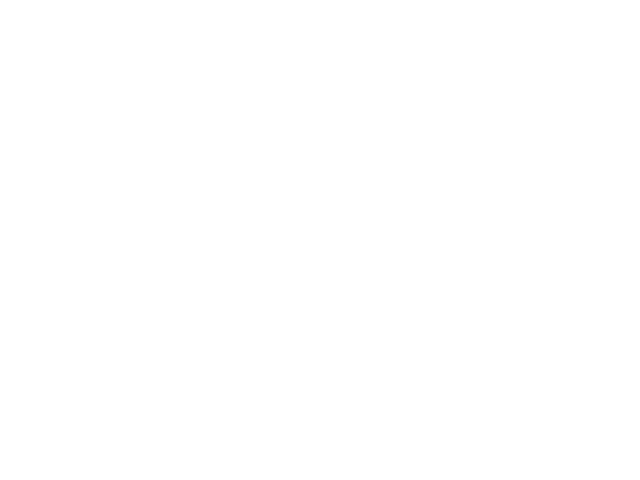

In [36]:
plt.figure()


train["training_hours"].hist().grid(False)



plt.show()

## target

<IPython.core.display.Javascript object>


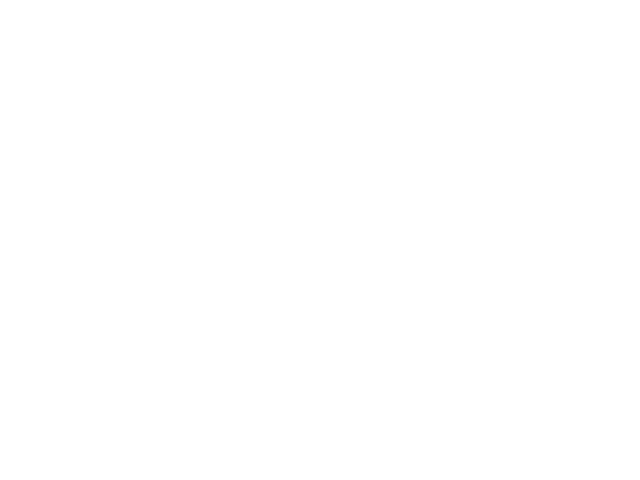

In [37]:
plt.figure()

train["target"].value_counts().plot.barh()

plt.show()

In [38]:
report = ProfileReport(train)

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


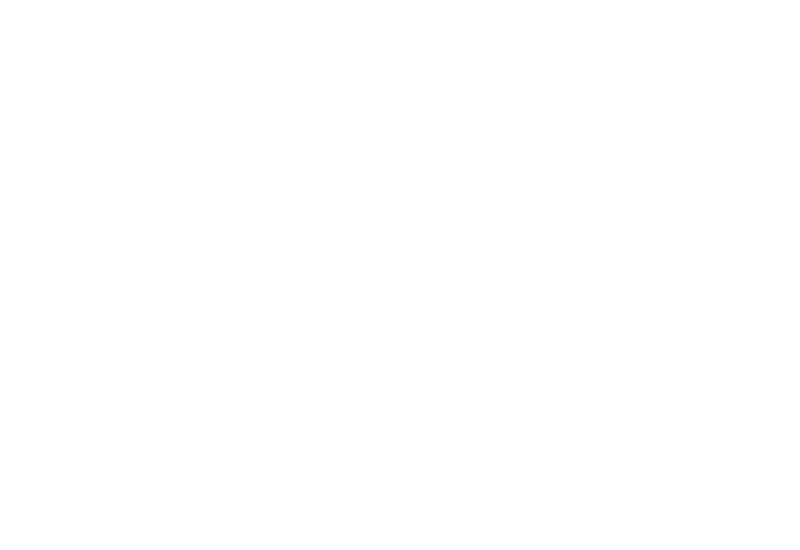

<IPython.core.display.Javascript object>


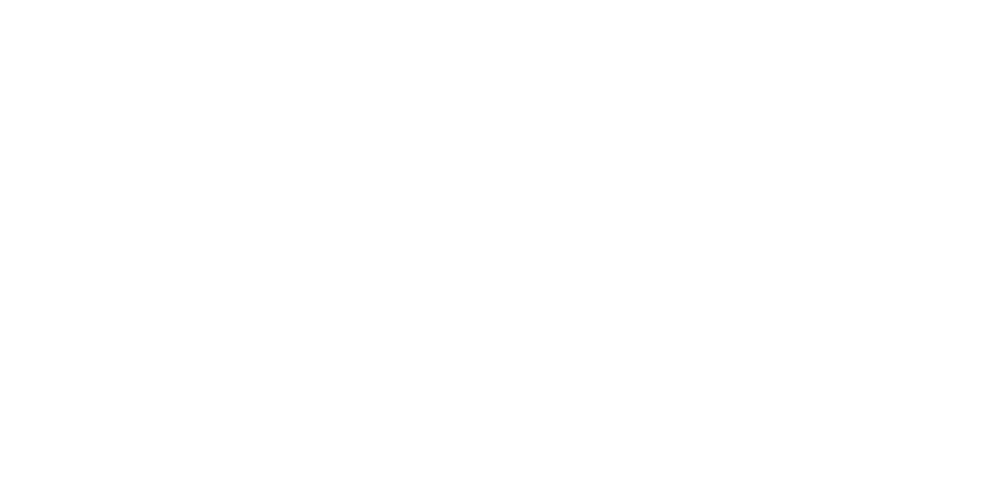

<IPython.core.display.Javascript object>


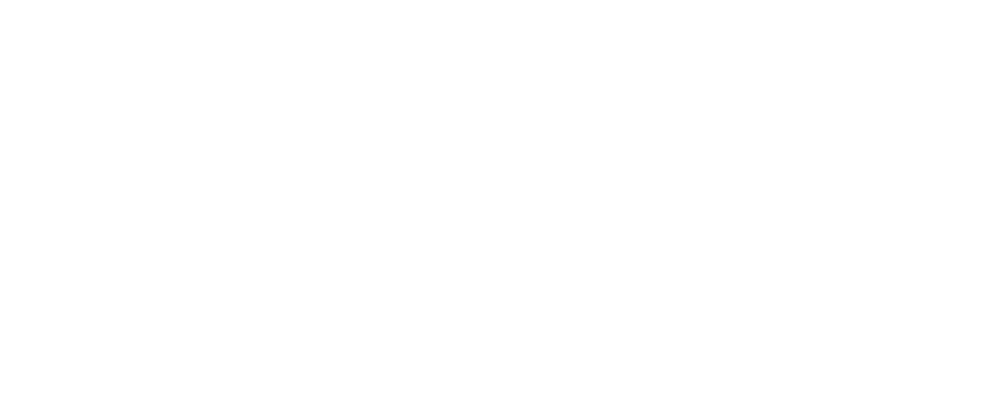

<IPython.core.display.Javascript object>


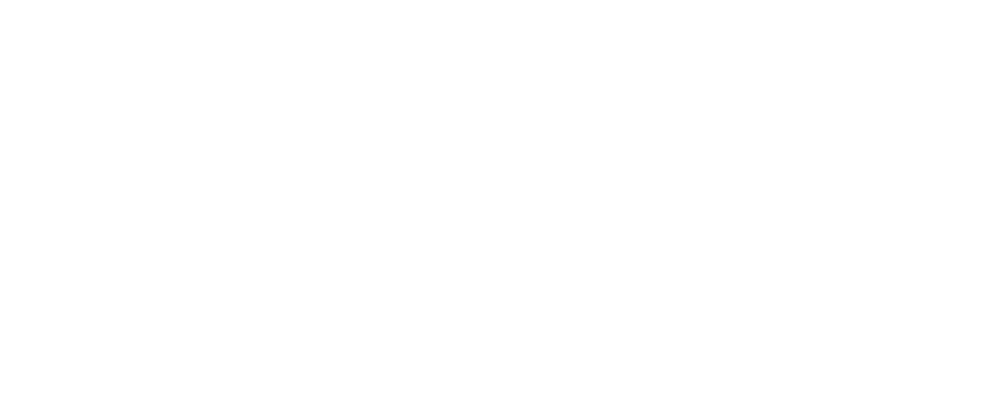

<IPython.core.display.Javascript object>


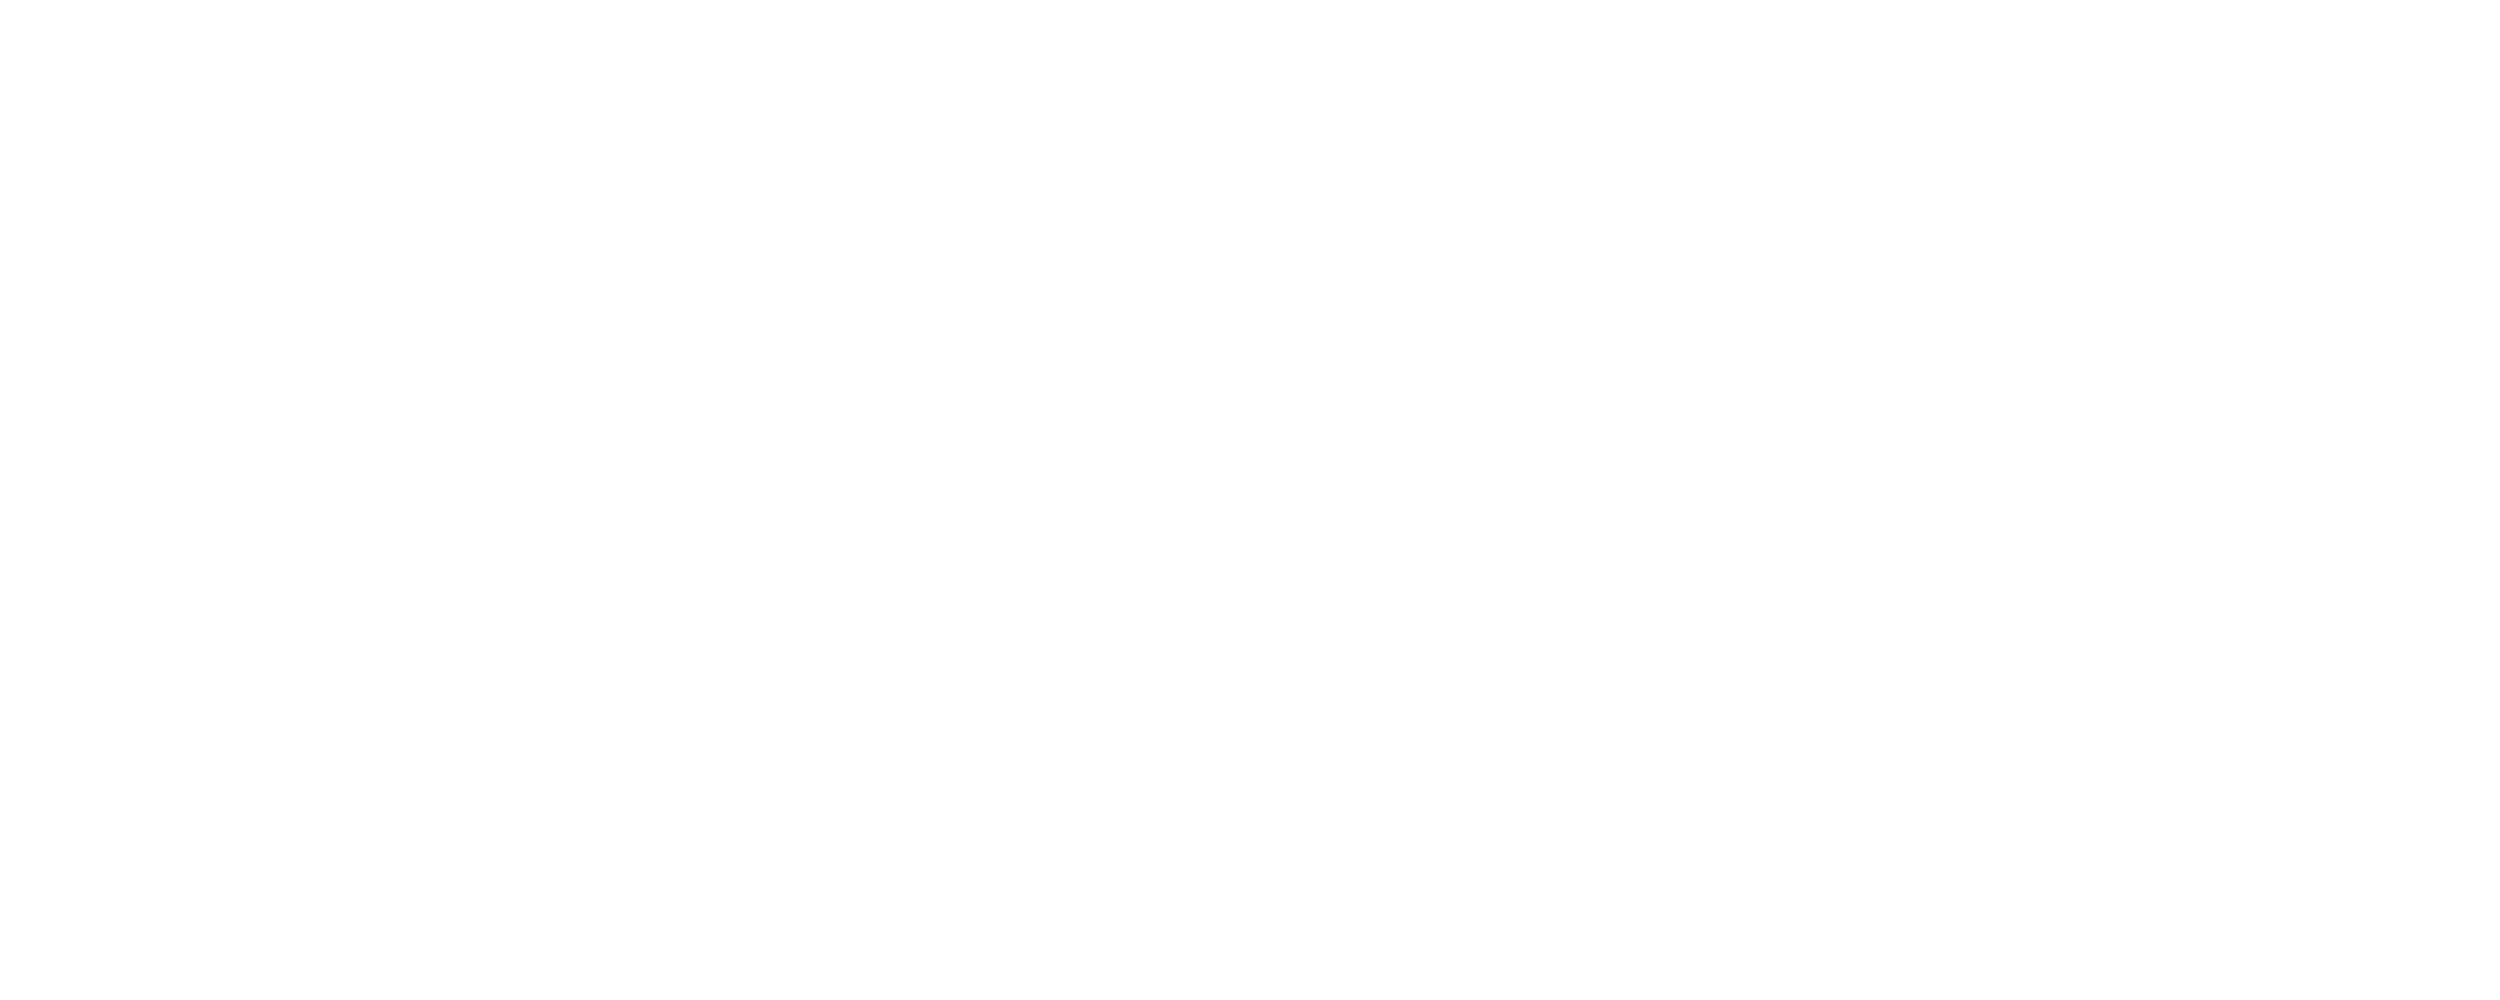

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


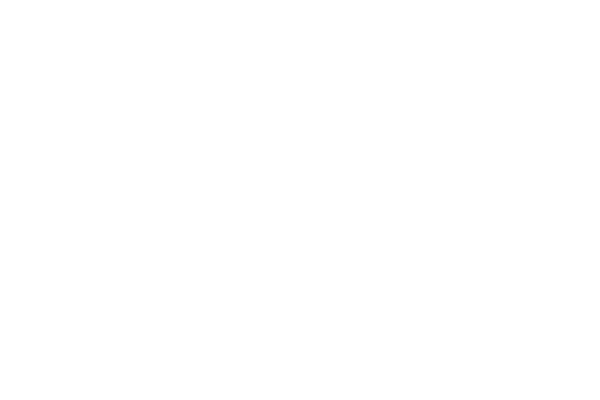

<IPython.core.display.Javascript object>


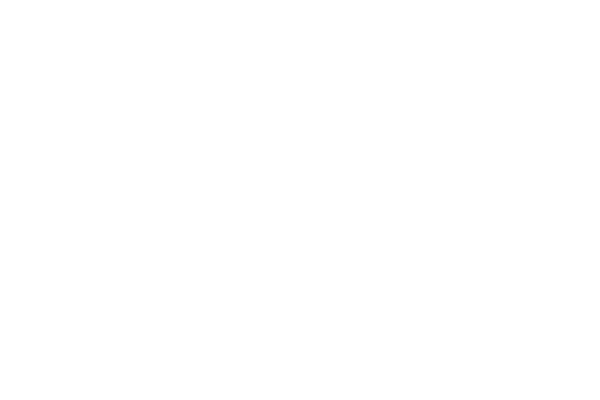

<IPython.core.display.Javascript object>


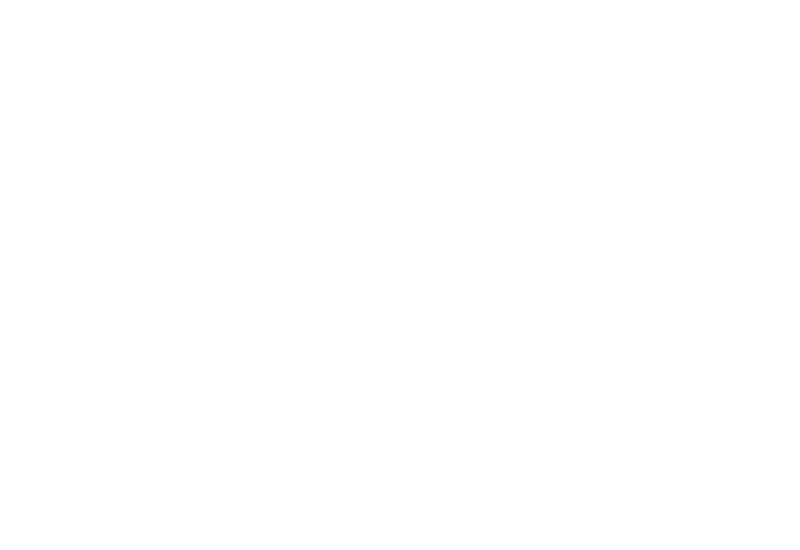

<IPython.core.display.Javascript object>


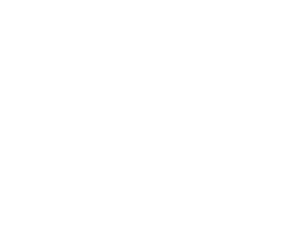

<IPython.core.display.Javascript object>


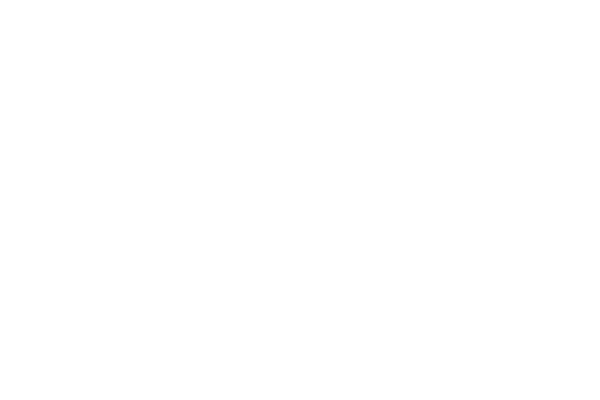

<IPython.core.display.Javascript object>


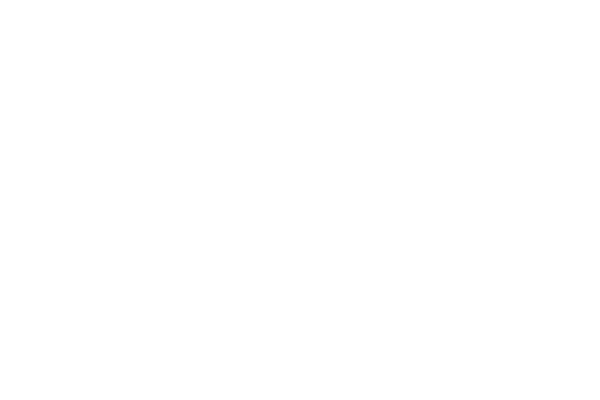

<IPython.core.display.Javascript object>


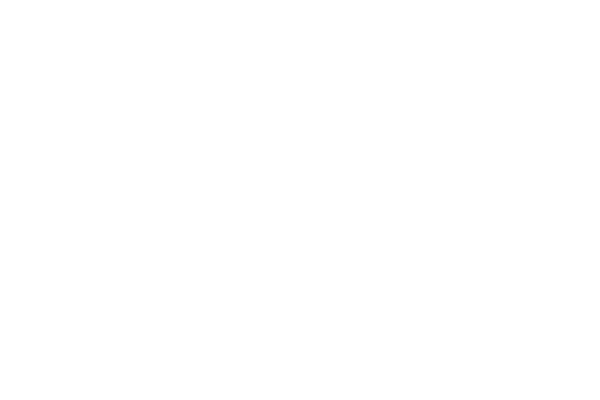

<IPython.core.display.Javascript object>


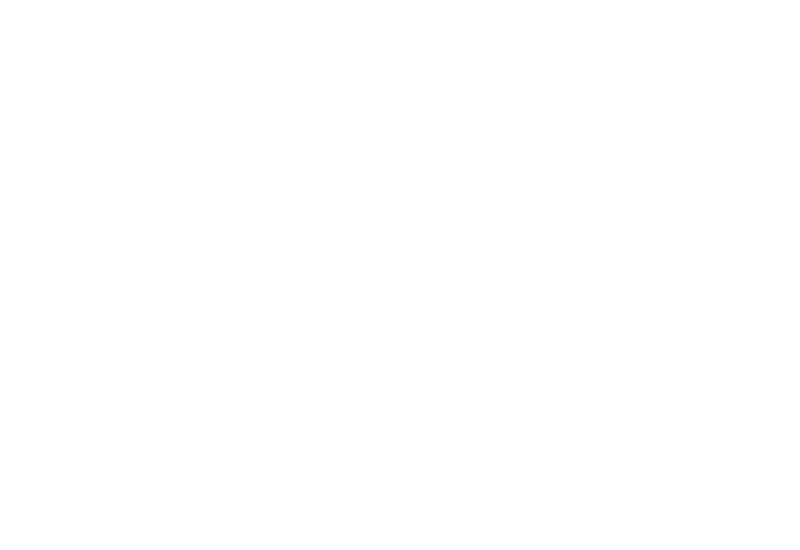

<IPython.core.display.Javascript object>


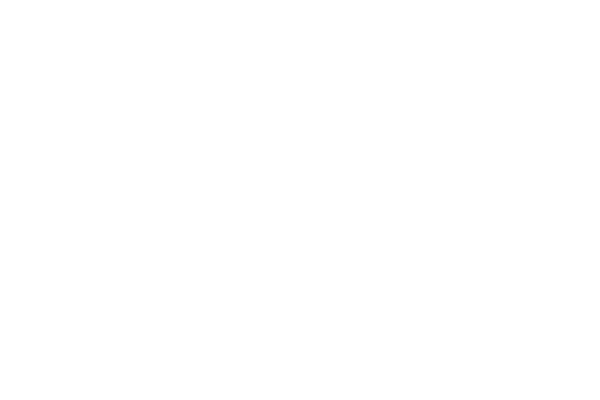

<IPython.core.display.Javascript object>


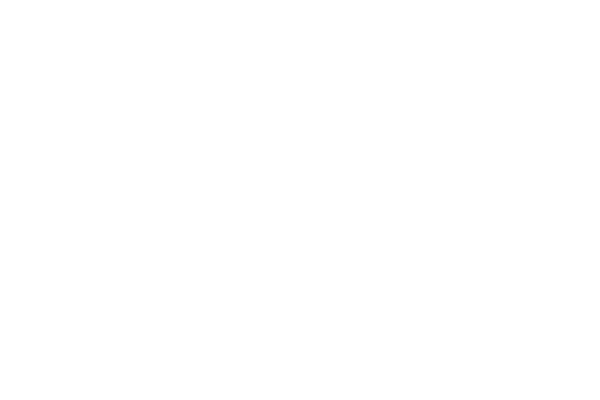

<IPython.core.display.Javascript object>


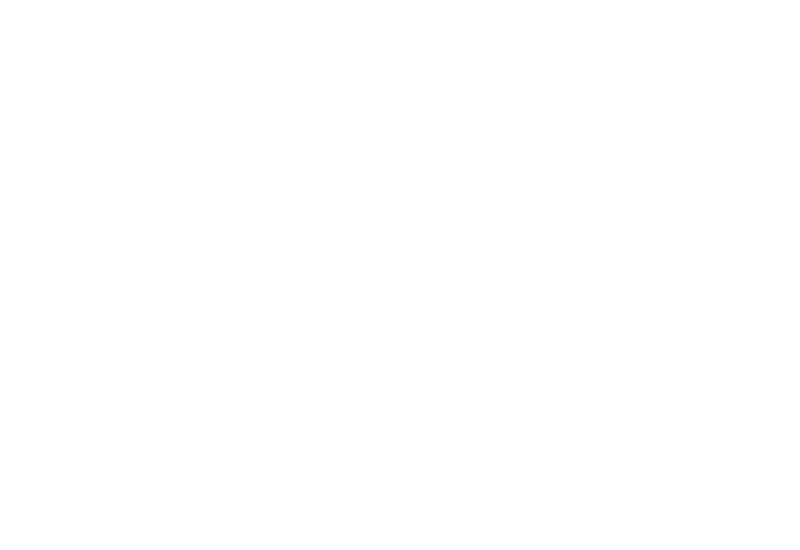

<IPython.core.display.Javascript object>


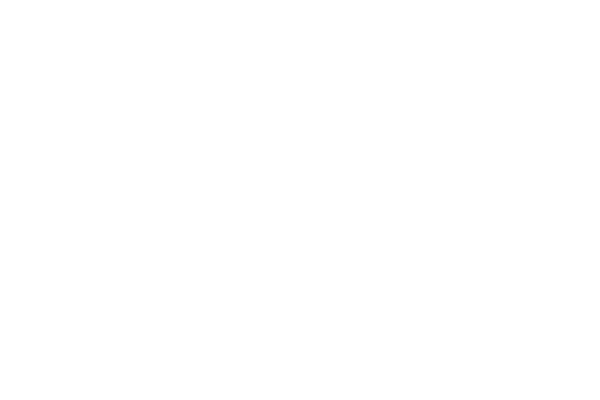

<IPython.core.display.Javascript object>


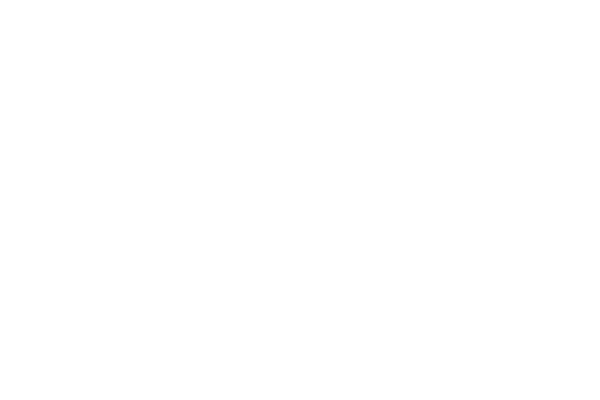

<IPython.core.display.Javascript object>


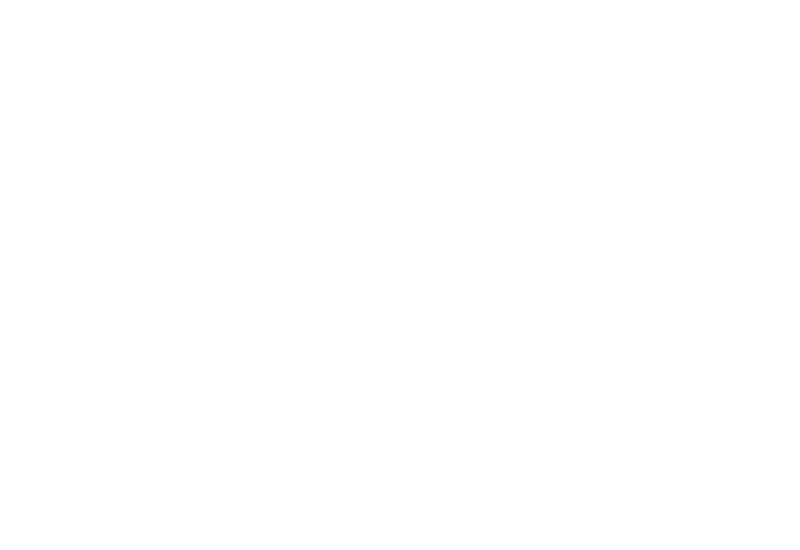

<IPython.core.display.Javascript object>


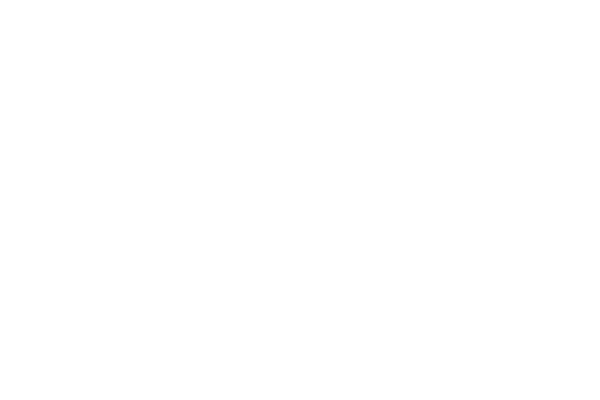

<IPython.core.display.Javascript object>


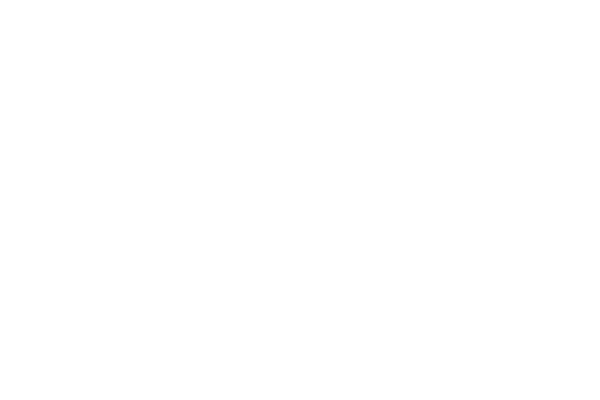

<IPython.core.display.Javascript object>


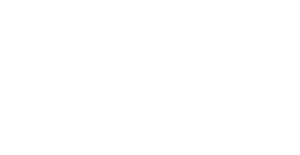

<IPython.core.display.Javascript object>


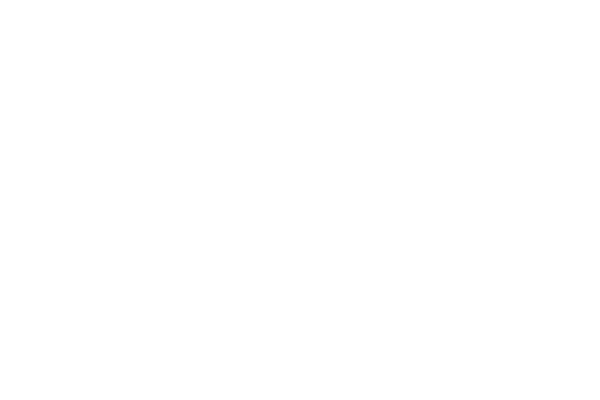

<IPython.core.display.Javascript object>


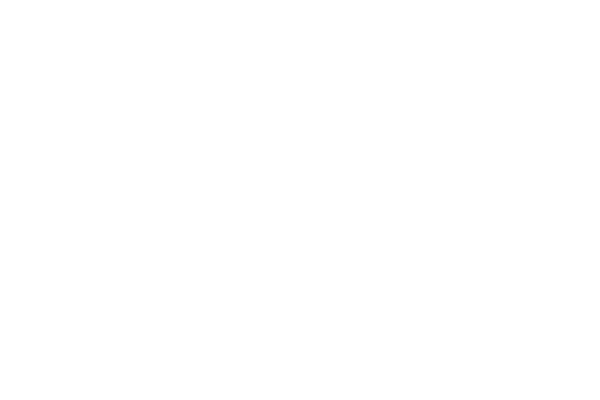

<IPython.core.display.Javascript object>


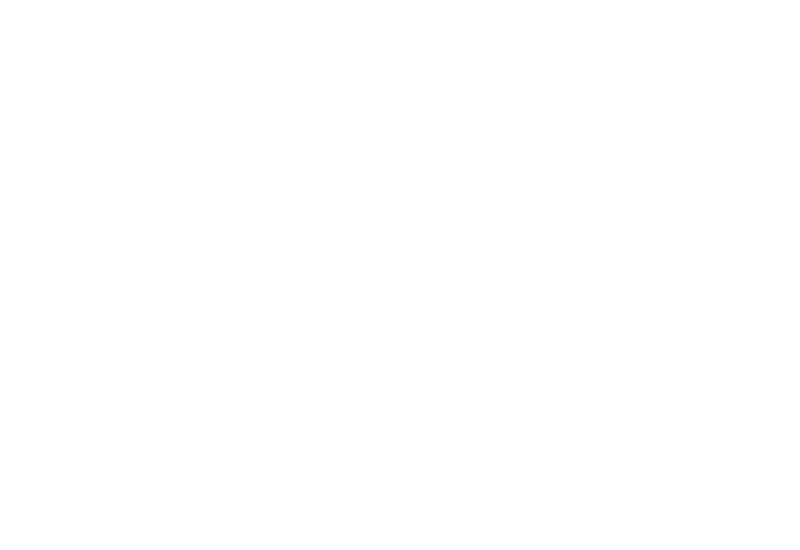

<IPython.core.display.Javascript object>


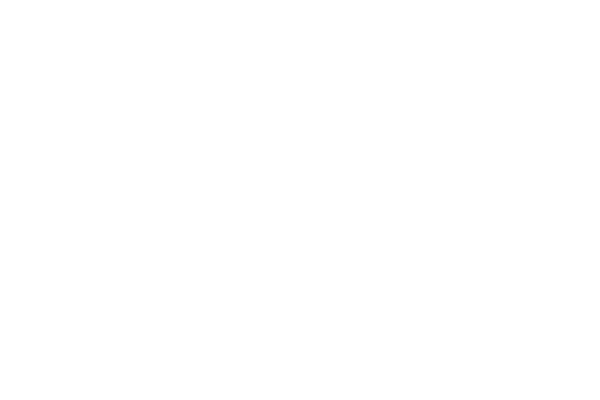

<IPython.core.display.Javascript object>


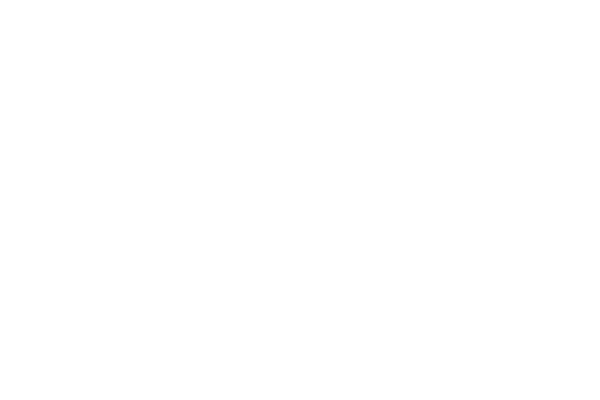

<IPython.core.display.Javascript object>


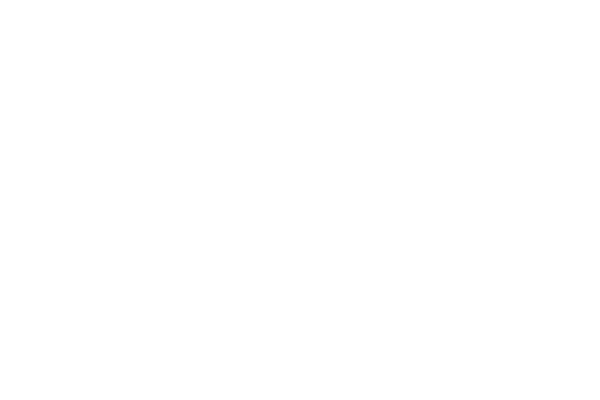

<IPython.core.display.Javascript object>


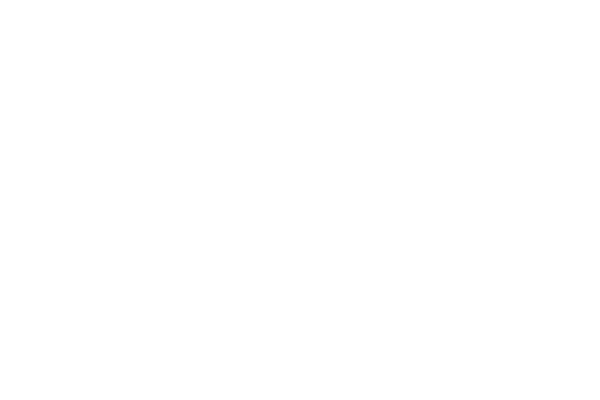

<IPython.core.display.Javascript object>


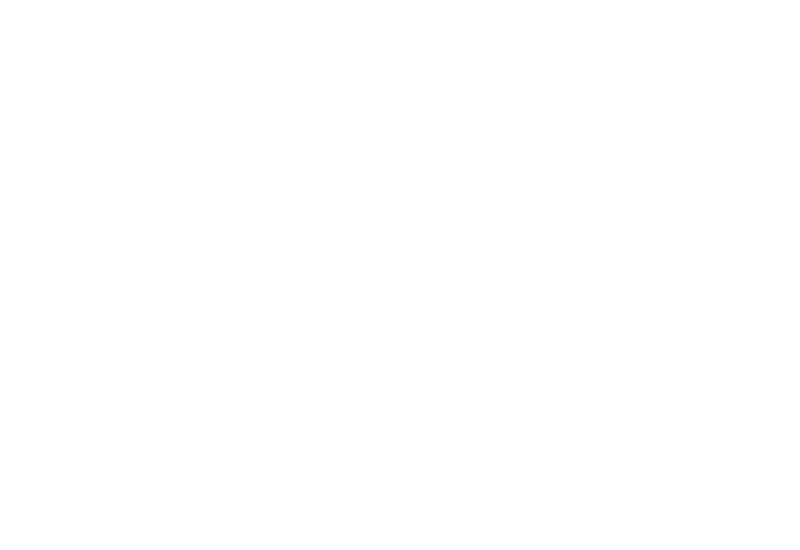

<IPython.core.display.Javascript object>


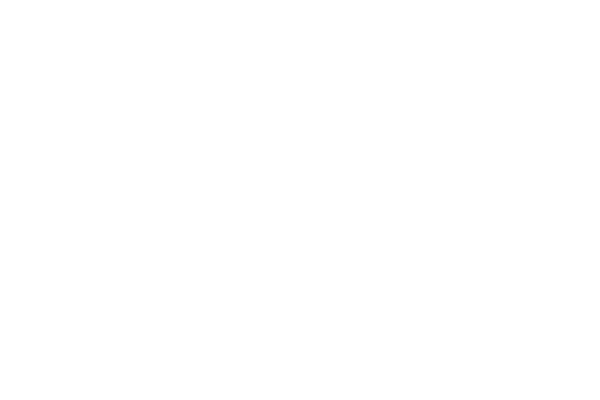

<IPython.core.display.Javascript object>


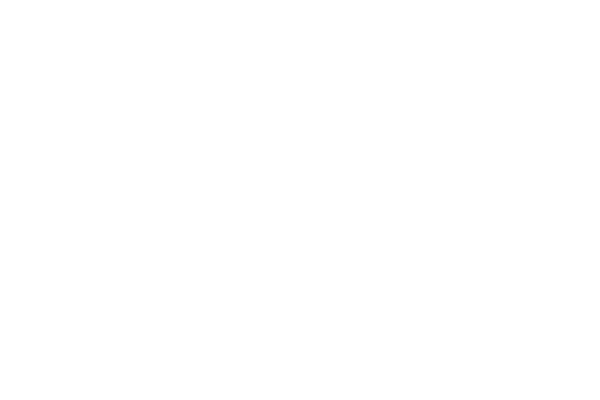

<IPython.core.display.Javascript object>


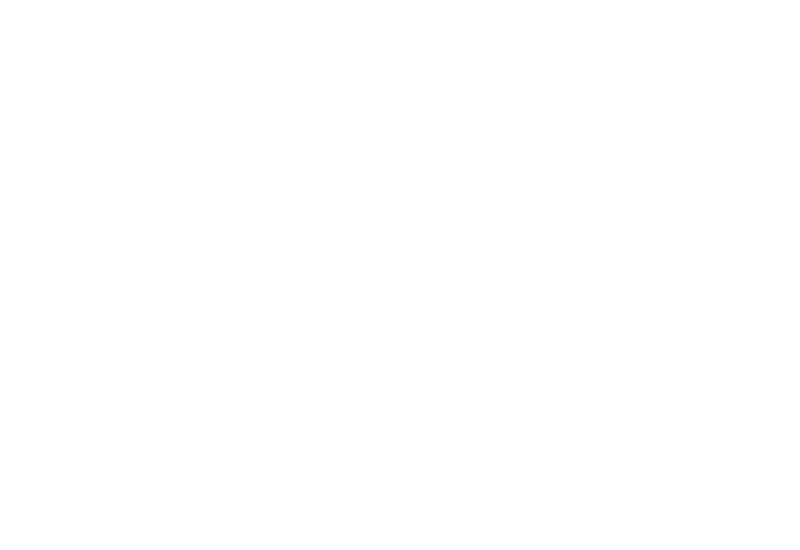

<IPython.core.display.Javascript object>


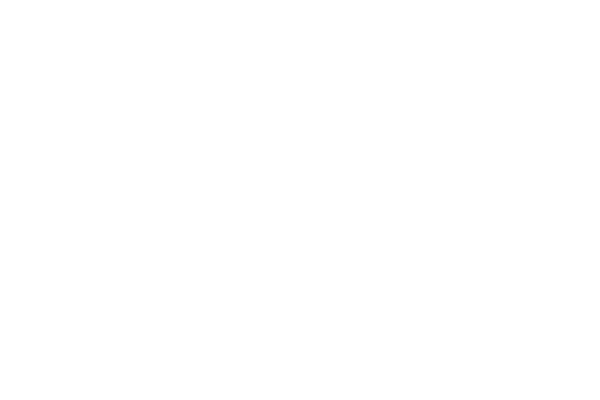

<IPython.core.display.Javascript object>


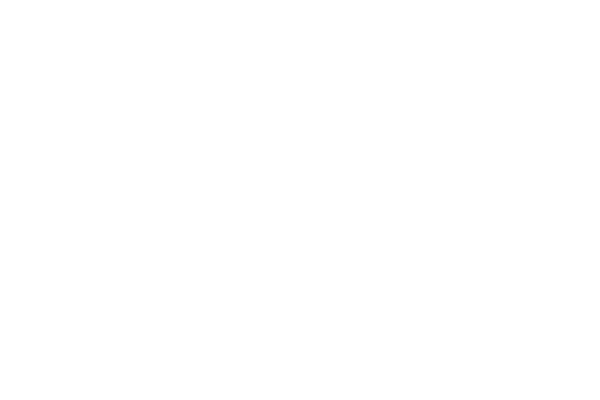

<IPython.core.display.Javascript object>


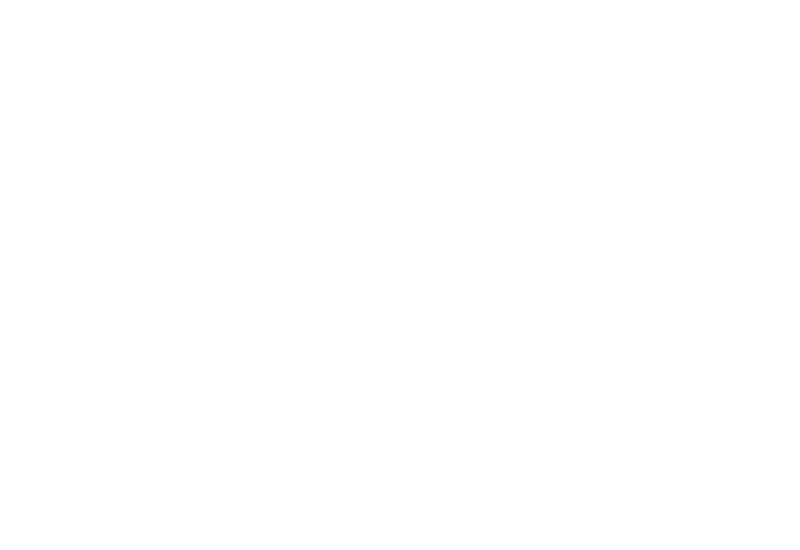

<IPython.core.display.Javascript object>


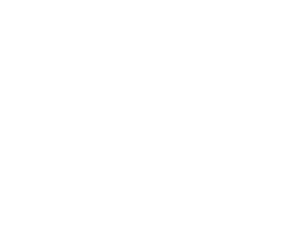

<IPython.core.display.Javascript object>


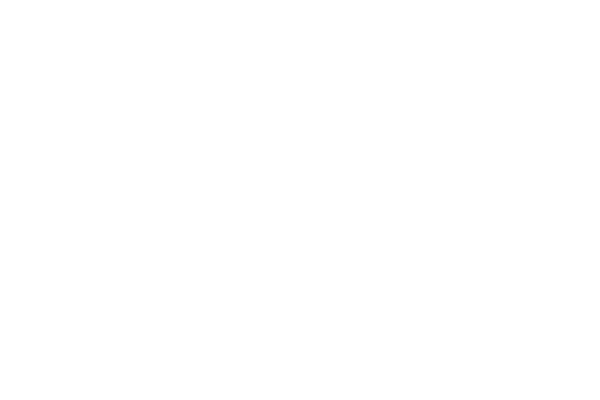

<IPython.core.display.Javascript object>


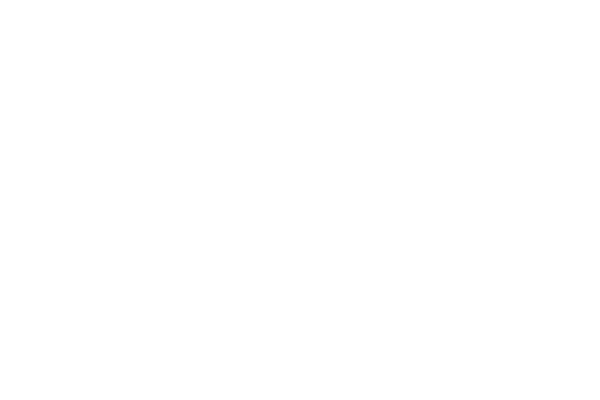

<IPython.core.display.Javascript object>


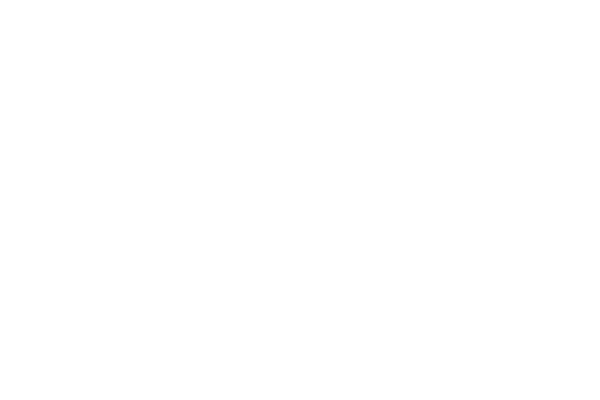

<IPython.core.display.Javascript object>


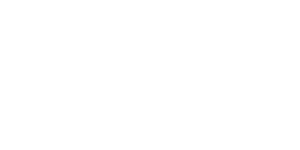

<IPython.core.display.Javascript object>


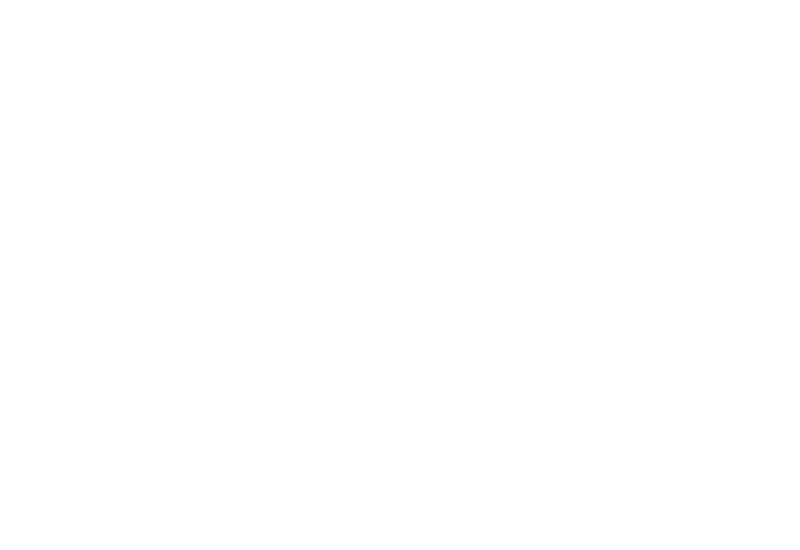

<IPython.core.display.Javascript object>


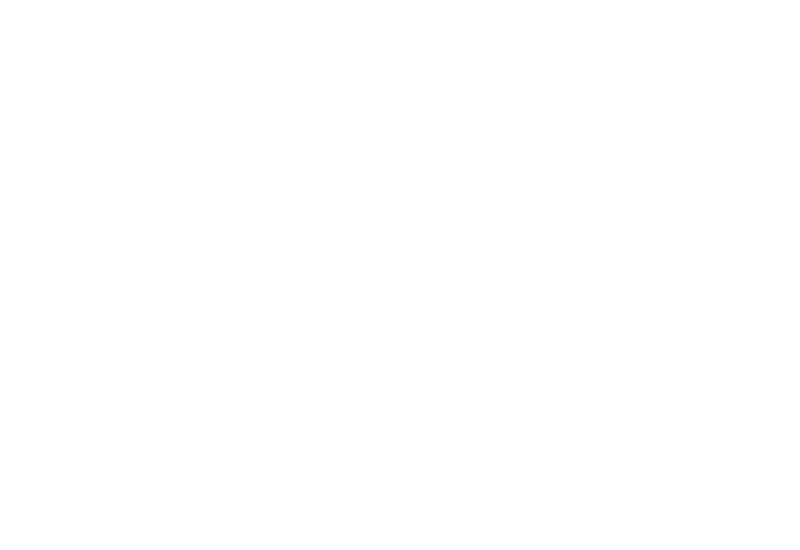

<IPython.core.display.Javascript object>


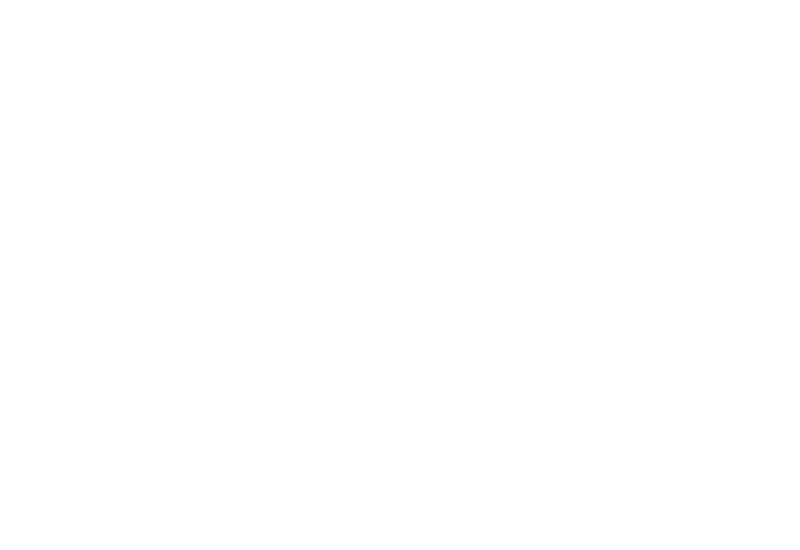

<IPython.core.display.Javascript object>


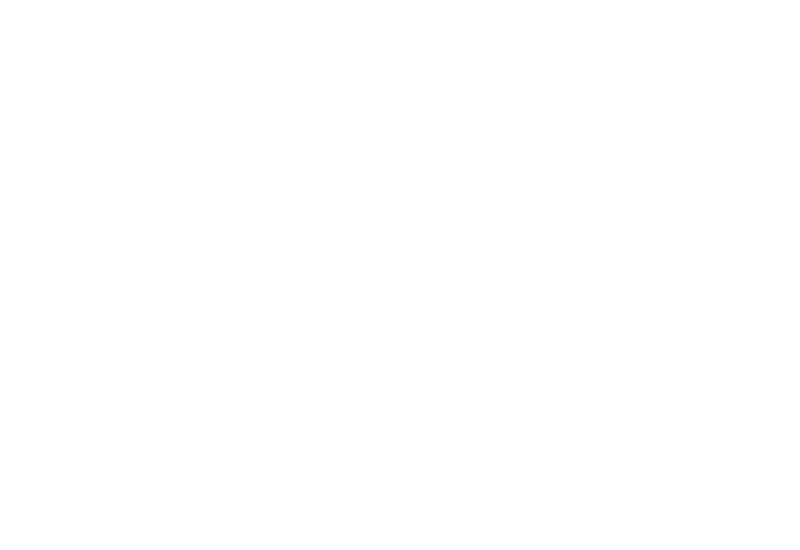

<IPython.core.display.Javascript object>


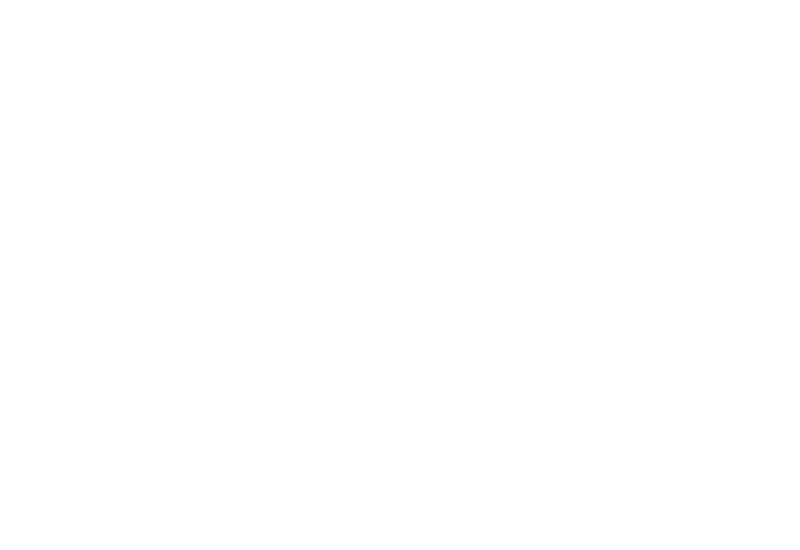

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
report